In [152]:
from __future__ import print_function, division
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from multiprocessing import  Pool

from platform import python_version

print(python_version())


3.6.8


In [217]:
paper = open("Economics_papers.dat",'r')
lines = paper.readlines()

In [218]:
heading = lines[0].replace("\n","").split("||||")
heading =['Id',
            'garbage',
            'og:title',
            'og:site_name',
            'citation_online_date',
            'citation_title',
            'citation_author',
            'citation_pdf_url',
            'citation_arxiv_id',
            'og:description',
            'twitter:site',
            'citation_date',
            'twitter:title',
            'twitter:description',
            'og:url',
            'category','']

In [219]:
paper_dict = {}
for key in heading:
    paper_dict[key] = []

In [220]:
for line in lines[1:-1]:
    content_data = line.replace("\n","").split("||||")
    for index, data in enumerate(content_data):
        paper_dict[heading[index]].append(data)

In [221]:
paper_df = pd.DataFrame.from_dict(paper_dict)

In [222]:
paper_df.head()

,Id,garbage,og:title,og:site_name,citation_online_date,citation_title,citation_author,citation_pdf_url,citation_arxiv_id,og:description,twitter:site,citation_date,twitter:title,twitter:description,og:url,category,
0,0,None,Regression Discontinuity Design under Self-sel...,arXiv.org,2019/11/21,Regression Discontinuity Design under Self-sel...,"Peng, Sida || Ning, Yang",https://arxiv.org/pdf/1911.09248,1911.09248,"In Regression Discontinuity (RD) design, self-...",@arxiv,2019/11/21,Regression Discontinuity Design under Self-sel...,"In Regression Discontinuity (RD) design, self-...",https://arxiv.org/abs/1911.09248v1,econ,
1,1,None,Tests for qualitative features in the random c...,arXiv.org,2018/03/14,Tests for qualitative features in the random c...,"Dunker, Fabian || Eckle, Konstantin || Proksch...",https://arxiv.org/pdf/1704.01066,1704.01066,The random coefficients model is an extension ...,@arxiv,2017/04/04,Tests for qualitative features in the random c...,The random coefficients model is an extension ...,https://arxiv.org/abs/1704.01066v3,econ,
2,2,None,Probabilistic Forecasting in Day-Ahead Electri...,arXiv.org,2019/12/02,Probabilistic Forecasting in Day-Ahead Electri...,"Muniain, Peru || Ziel, Florian",https://arxiv.org/pdf/1810.08418,1810.08418,In this paper we include dependency structures...,@arxiv,2018/10/19,Probabilistic Forecasting in Day-Ahead Electri...,In this paper we include dependency structures...,https://arxiv.org/abs/1810.08418v2,econ,
3,3,None,University rankings from the revealed preferen...,arXiv.org,2019/09/09,University rankings from the revealed preferen...,"Csató, László || Tóth, Csaba",https://arxiv.org/pdf/1810.04087,1810.04087,A methodology is presented to rank universitie...,@arxiv,2018/10/09,University rankings from the revealed preferen...,A methodology is presented to rank universitie...,https://arxiv.org/abs/1810.04087v5,econ,
4,4,None,Regularized Estimation of High-dimensional Fac...,arXiv.org,2019/12/09,Regularized Estimation of High-dimensional Fac...,"Lin, Jiahe || Michailidis, George",https://arxiv.org/pdf/1912.04146,1912.04146,A factor-augmented vector autoregressive (FAVA...,@arxiv,2019/12/09,Regularized Estimation of High-dimensional Fac...,A factor-augmented vector autoregressive (FAVA...,https://arxiv.org/abs/1912.04146v1,econ,


In [161]:
paper_df.drop(["garbage"], axis= 1, inplace=True)

In [162]:
len(set(paper_df.Id))

765

In [163]:
paper_df.head()

,Id,og:title,og:site_name,citation_online_date,citation_title,citation_author,citation_pdf_url,citation_arxiv_id,og:description,twitter:site,citation_date,twitter:title,twitter:description,og:url,category,
0,0,Regression Discontinuity Design under Self-sel...,arXiv.org,2019/11/21,Regression Discontinuity Design under Self-sel...,"Peng, Sida || Ning, Yang",https://arxiv.org/pdf/1911.09248,1911.09248,"In Regression Discontinuity (RD) design, self-...",@arxiv,2019/11/21,Regression Discontinuity Design under Self-sel...,"In Regression Discontinuity (RD) design, self-...",https://arxiv.org/abs/1911.09248v1,econ,
1,1,Tests for qualitative features in the random c...,arXiv.org,2018/03/14,Tests for qualitative features in the random c...,"Dunker, Fabian || Eckle, Konstantin || Proksch...",https://arxiv.org/pdf/1704.01066,1704.01066,The random coefficients model is an extension ...,@arxiv,2017/04/04,Tests for qualitative features in the random c...,The random coefficients model is an extension ...,https://arxiv.org/abs/1704.01066v3,econ,
2,2,Probabilistic Forecasting in Day-Ahead Electri...,arXiv.org,2019/12/02,Probabilistic Forecasting in Day-Ahead Electri...,"Muniain, Peru || Ziel, Florian",https://arxiv.org/pdf/1810.08418,1810.08418,In this paper we include dependency structures...,@arxiv,2018/10/19,Probabilistic Forecasting in Day-Ahead Electri...,In this paper we include dependency structures...,https://arxiv.org/abs/1810.08418v2,econ,
3,3,University rankings from the revealed preferen...,arXiv.org,2019/09/09,University rankings from the revealed preferen...,"Csató, László || Tóth, Csaba",https://arxiv.org/pdf/1810.04087,1810.04087,A methodology is presented to rank universitie...,@arxiv,2018/10/09,University rankings from the revealed preferen...,A methodology is presented to rank universitie...,https://arxiv.org/abs/1810.04087v5,econ,
4,4,Regularized Estimation of High-dimensional Fac...,arXiv.org,2019/12/09,Regularized Estimation of High-dimensional Fac...,"Lin, Jiahe || Michailidis, George",https://arxiv.org/pdf/1912.04146,1912.04146,A factor-augmented vector autoregressive (FAVA...,@arxiv,2019/12/09,Regularized Estimation of High-dimensional Fac...,A factor-augmented vector autoregressive (FAVA...,https://arxiv.org/abs/1912.04146v1,econ,


In [164]:
paper_df.drop_duplicates(subset="Id",keep = 'first', inplace = True) 

In [165]:
paper_df.head()

,Id,og:title,og:site_name,citation_online_date,citation_title,citation_author,citation_pdf_url,citation_arxiv_id,og:description,twitter:site,citation_date,twitter:title,twitter:description,og:url,category,
0,0,Regression Discontinuity Design under Self-sel...,arXiv.org,2019/11/21,Regression Discontinuity Design under Self-sel...,"Peng, Sida || Ning, Yang",https://arxiv.org/pdf/1911.09248,1911.09248,"In Regression Discontinuity (RD) design, self-...",@arxiv,2019/11/21,Regression Discontinuity Design under Self-sel...,"In Regression Discontinuity (RD) design, self-...",https://arxiv.org/abs/1911.09248v1,econ,
1,1,Tests for qualitative features in the random c...,arXiv.org,2018/03/14,Tests for qualitative features in the random c...,"Dunker, Fabian || Eckle, Konstantin || Proksch...",https://arxiv.org/pdf/1704.01066,1704.01066,The random coefficients model is an extension ...,@arxiv,2017/04/04,Tests for qualitative features in the random c...,The random coefficients model is an extension ...,https://arxiv.org/abs/1704.01066v3,econ,
2,2,Probabilistic Forecasting in Day-Ahead Electri...,arXiv.org,2019/12/02,Probabilistic Forecasting in Day-Ahead Electri...,"Muniain, Peru || Ziel, Florian",https://arxiv.org/pdf/1810.08418,1810.08418,In this paper we include dependency structures...,@arxiv,2018/10/19,Probabilistic Forecasting in Day-Ahead Electri...,In this paper we include dependency structures...,https://arxiv.org/abs/1810.08418v2,econ,
3,3,University rankings from the revealed preferen...,arXiv.org,2019/09/09,University rankings from the revealed preferen...,"Csató, László || Tóth, Csaba",https://arxiv.org/pdf/1810.04087,1810.04087,A methodology is presented to rank universitie...,@arxiv,2018/10/09,University rankings from the revealed preferen...,A methodology is presented to rank universitie...,https://arxiv.org/abs/1810.04087v5,econ,
4,4,Regularized Estimation of High-dimensional Fac...,arXiv.org,2019/12/09,Regularized Estimation of High-dimensional Fac...,"Lin, Jiahe || Michailidis, George",https://arxiv.org/pdf/1912.04146,1912.04146,A factor-augmented vector autoregressive (FAVA...,@arxiv,2019/12/09,Regularized Estimation of High-dimensional Fac...,A factor-augmented vector autoregressive (FAVA...,https://arxiv.org/abs/1912.04146v1,econ,


In [166]:
paper_df.drop(["og:site_name"], axis= 1, inplace=True)
paper_df.drop(["twitter:site"], axis= 1, inplace=True)
paper_df.drop(["twitter:title"], axis= 1, inplace=True)
paper_df.drop(["twitter:description"], axis= 1, inplace=True)

In [167]:
paper_df.head()

,Id,og:title,citation_online_date,citation_title,citation_author,citation_pdf_url,citation_arxiv_id,og:description,citation_date,og:url,category,
0,0,Regression Discontinuity Design under Self-sel...,2019/11/21,Regression Discontinuity Design under Self-sel...,"Peng, Sida || Ning, Yang",https://arxiv.org/pdf/1911.09248,1911.09248,"In Regression Discontinuity (RD) design, self-...",2019/11/21,https://arxiv.org/abs/1911.09248v1,econ,
1,1,Tests for qualitative features in the random c...,2018/03/14,Tests for qualitative features in the random c...,"Dunker, Fabian || Eckle, Konstantin || Proksch...",https://arxiv.org/pdf/1704.01066,1704.01066,The random coefficients model is an extension ...,2017/04/04,https://arxiv.org/abs/1704.01066v3,econ,
2,2,Probabilistic Forecasting in Day-Ahead Electri...,2019/12/02,Probabilistic Forecasting in Day-Ahead Electri...,"Muniain, Peru || Ziel, Florian",https://arxiv.org/pdf/1810.08418,1810.08418,In this paper we include dependency structures...,2018/10/19,https://arxiv.org/abs/1810.08418v2,econ,
3,3,University rankings from the revealed preferen...,2019/09/09,University rankings from the revealed preferen...,"Csató, László || Tóth, Csaba",https://arxiv.org/pdf/1810.04087,1810.04087,A methodology is presented to rank universitie...,2018/10/09,https://arxiv.org/abs/1810.04087v5,econ,
4,4,Regularized Estimation of High-dimensional Fac...,2019/12/09,Regularized Estimation of High-dimensional Fac...,"Lin, Jiahe || Michailidis, George",https://arxiv.org/pdf/1912.04146,1912.04146,A factor-augmented vector autoregressive (FAVA...,2019/12/09,https://arxiv.org/abs/1912.04146v1,econ,


## To do analysis on abstract of each paper

In [210]:
import nltk
import re
from nltk.util import ngrams
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import re

stop_words = set(stopwords.words("english"))
# gets words from abstract
def get_abstract_words(text_abs, ngram_range = (1,2), list_flag = True):
    try:
        words = {}
        words_freq = {}
        #Remove punctuations
        text = re.sub('[^a-zA-Z]', ' ', text_abs)
    
        #Convert to lowercase
        text = text.lower()
    
        #remove tags
        text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
        # remove special characters and digits
        text=re.sub("(\\d|\\W)+"," ",text)
    
        ##Convert to list from string
        text = text.split()
    
        ##Stemming
        ps=PorterStemmer()   
        #Lemmatisation
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in  stop_words] 
        if list_flag:
            ngram_list = []
            ngrams_low = min(ngram_range)
            ngrams_high = max(ngram_range)
            for ngram_tag in range(ngrams_low, ngrams_high+1):
                n_grams_tuple = ngrams(text, ngram_tag)
                n_grams_joined_list = [ ' '.join(grams) for grams in n_grams_tuple]
                ngram_list = ngram_list + n_grams_joined_list
            return ngram_list
            
        else:
            
            text = [" ".join(text)]
            cv=CountVectorizer(max_df=1,stop_words=stop_words, max_features=10000, ngram_range=ngram_range).fit(text)
            bag_of_words=cv.transform(text)
            sum_words = bag_of_words.sum(axis=0)
            words_freq = {word:sum_words[0, idx] for word, idx in cv.vocabulary_.items()}
            
            return words_freq
    except:
        if list_flag:
            return []
        else:
            return {}
        
 #gets top words       
def get_top_words(freq_dictonary,ngram=1,n=None):
    keys = freq_dictonary.keys()
    selected_keys_values = []
    for key in keys:
        if len(key.split()) == ngram:
            selected_keys_values.append((key,freq_dictonary[key]))
    
    words_freq =sorted(selected_keys_values, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# plots the word freq
def plot_word_freq(word_freq_tuple):
    from pandas import DataFrame
    word_freq_df = DataFrame(word_freq_tuple)
    word_freq_df.columns=["n-gram", "Freq"]

    #Barplot of most freq 
    from seaborn import set,barplot
    sns.set(rc={'figure.figsize':(13,8)})
    j=sns.barplot(x="n-gram", y="Freq", data=word_freq_df)
    j.set_xticklabels(j.get_xticklabels(), rotation=45)
    plt.show()
    
    
    
#converts dictonary to list where dictonary's key is the word and value is its frequency
def dict_to_list(dictonary):
    output_list = []
    for keys in dictonary:
        output_list = output_list + dictonary[keys] * [keys]
    return output_list


#function to parallelize data frame
def parallelize_dataframe(df, func, n_cores=16):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

    

# add abstract in data frame which is the list of key words
def add_abstract(df):
    df["abstract"] = df["og:description"].apply(get_abstract_words)
    return df


# converts the dictoanry to list
def add_abstract_key_list(df):
    df["abstract_key_list"] = df["abstract"].apply(dict_to_list)
    return df    

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hbhattar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/hbhattar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [170]:
new_paper_df = parallelize_dataframe(paper_df,add_abstract)
new_paper_df.head()

,Id,og:title,citation_online_date,citation_title,citation_author,citation_pdf_url,citation_arxiv_id,og:description,citation_date,og:url,category,,abstract
0,0,Regression Discontinuity Design under Self-sel...,2019/11/21,Regression Discontinuity Design under Self-sel...,"Peng, Sida || Ning, Yang",https://arxiv.org/pdf/1911.09248,1911.09248,"In Regression Discontinuity (RD) design, self-...",2019/11/21,https://arxiv.org/abs/1911.09248v1,econ,,"[regression, discontinuity, rd, design, self, ..."
1,1,Tests for qualitative features in the random c...,2018/03/14,Tests for qualitative features in the random c...,"Dunker, Fabian || Eckle, Konstantin || Proksch...",https://arxiv.org/pdf/1704.01066,1704.01066,The random coefficients model is an extension ...,2017/04/04,https://arxiv.org/abs/1704.01066v3,econ,,"[random, coefficient, model, extension, linear..."
2,2,Probabilistic Forecasting in Day-Ahead Electri...,2019/12/02,Probabilistic Forecasting in Day-Ahead Electri...,"Muniain, Peru || Ziel, Florian",https://arxiv.org/pdf/1810.08418,1810.08418,In this paper we include dependency structures...,2018/10/19,https://arxiv.org/abs/1810.08418v2,econ,,"[paper, include, dependency, structure, electr..."
3,3,University rankings from the revealed preferen...,2019/09/09,University rankings from the revealed preferen...,"Csató, László || Tóth, Csaba",https://arxiv.org/pdf/1810.04087,1810.04087,A methodology is presented to rank universitie...,2018/10/09,https://arxiv.org/abs/1810.04087v5,econ,,"[methodology, presented, rank, university, bas..."
4,4,Regularized Estimation of High-dimensional Fac...,2019/12/09,Regularized Estimation of High-dimensional Fac...,"Lin, Jiahe || Michailidis, George",https://arxiv.org/pdf/1912.04146,1912.04146,A factor-augmented vector autoregressive (FAVA...,2019/12/09,https://arxiv.org/abs/1912.04146v1,econ,,"[factor, augmented, vector, autoregressive, fa..."


In [171]:
def get_year(string):
    split = string.split("/")
    return split[0]

new_paper_df["year"] = new_paper_df["citation_date"].map(get_year)

In [172]:
subPaper_df = pd.DataFrame()

In [173]:
subPaper_df = new_paper_df[["Id","citation_title","year","category","og:description","abstract"]]

In [174]:
subPaper_df.head()

,Id,citation_title,year,category,og:description,abstract
0,0,Regression Discontinuity Design under Self-sel...,2019,econ,"In Regression Discontinuity (RD) design, self-...","[regression, discontinuity, rd, design, self, ..."
1,1,Tests for qualitative features in the random c...,2017,econ,The random coefficients model is an extension ...,"[random, coefficient, model, extension, linear..."
2,2,Probabilistic Forecasting in Day-Ahead Electri...,2018,econ,In this paper we include dependency structures...,"[paper, include, dependency, structure, electr..."
3,3,University rankings from the revealed preferen...,2018,econ,A methodology is presented to rank universitie...,"[methodology, presented, rank, university, bas..."
4,4,Regularized Estimation of High-dimensional Fac...,2019,econ,A factor-augmented vector autoregressive (FAVA...,"[factor, augmented, vector, autoregressive, fa..."


In [176]:
#collects all list of key words for given year and makes a dictonary
economics = {}
for year in years:
    economics[year] = list(subPaper_df[subPaper_df["year"] == str(year)]["abstract"])

In [179]:

# operations to merge list and merge dictonary
from collections import Counter
import functools
def sum_dict(x,y):
    return dict(Counter(x) + Counter(y))
def sum_list(x,y):
    return x + y

def combined_dictonary(list_dict):
    return(functools.reduce(sum_dict,list_dict))

def combined_list(list_list):
    return(functools.reduce(sum_list,list_list))


# function that returns dictoanry that has key as the key word and value as number of repeatations
def dictonary_count(list_words):
    keys = list(set(list_words))
    return [{key: list_words.count(key)} for key in keys]

def list_dict2freq_dict(list_dict):
    freq_dict = {}
    for item in list_dict:
        
        freq_dict[list(item.keys())[0]] = list(item.values())[0]
    return freq_dict


In [201]:
def get_frequent_words(dictonary_keys,year,ngram=1,keys=10):
    if year not in dictonary_keys.keys():
        print("Provide correct year.")
        return 0
    key_list_combined = combined_list(dictonary_keys[year])
    freqdict = dictonary_count(key_list_combined)
    freq_dict = list_dict2freq_dict(freqdict)
    plot_word_freq(get_top_words(freq_dict,ngram,keys))
    
        
    

Publication in year 2019


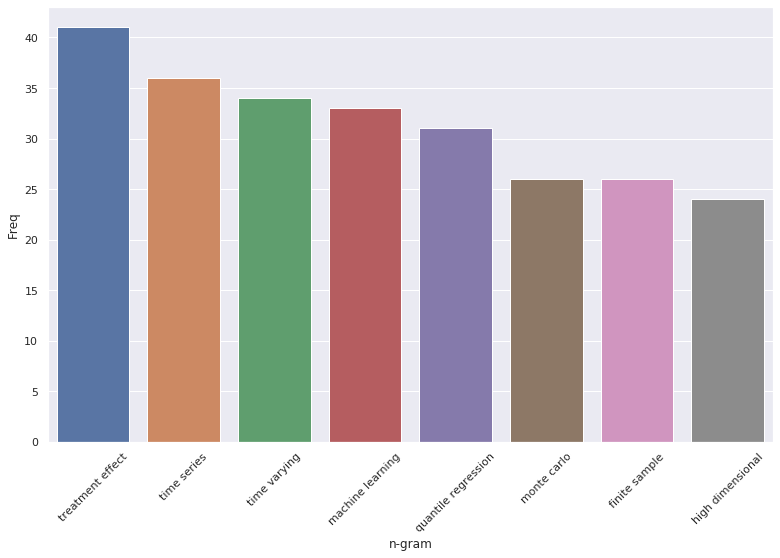

Publication in year 2017


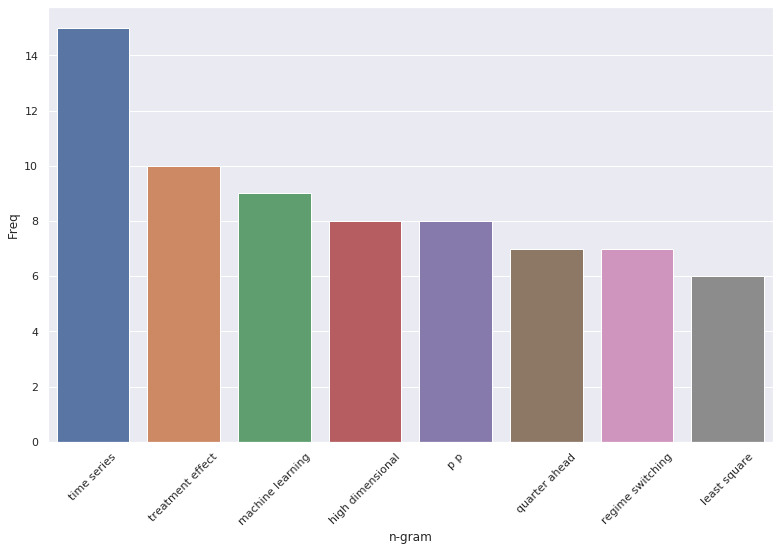

Publication in year 2018


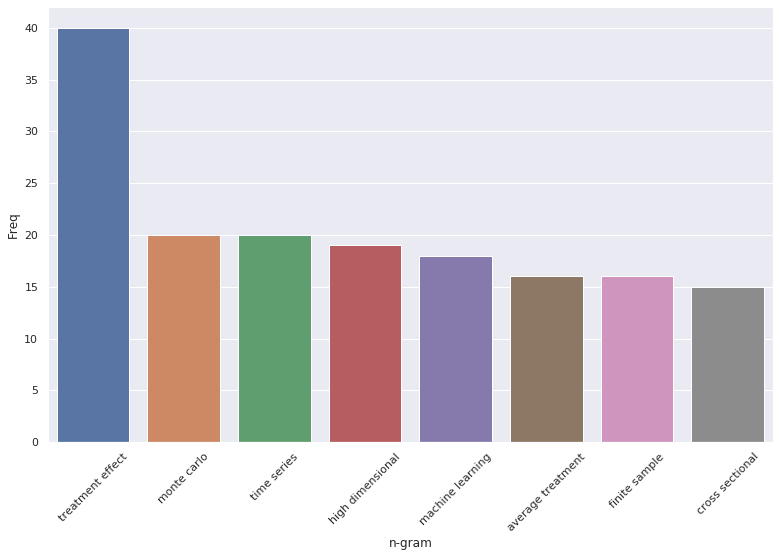

Publication in year 2020


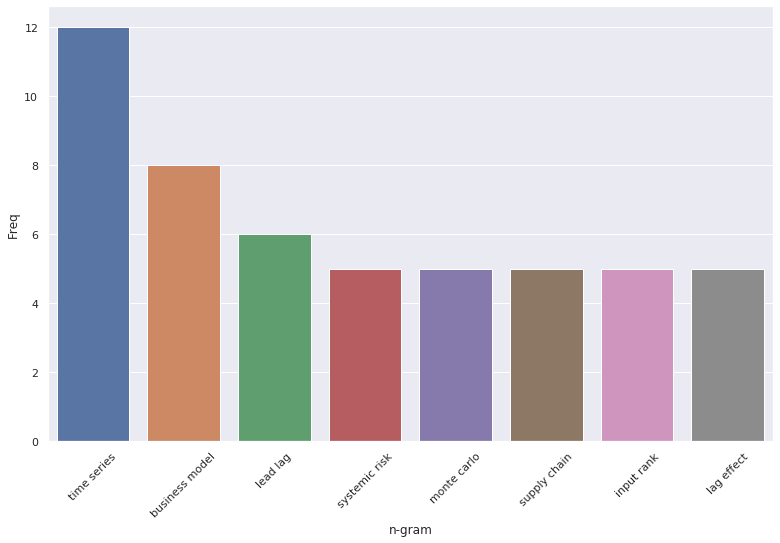

Publication in year 2016


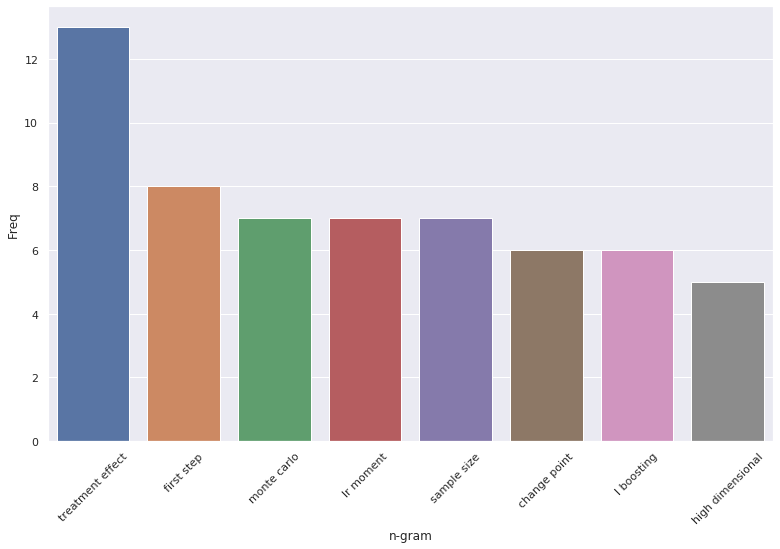

Publication in year 2012


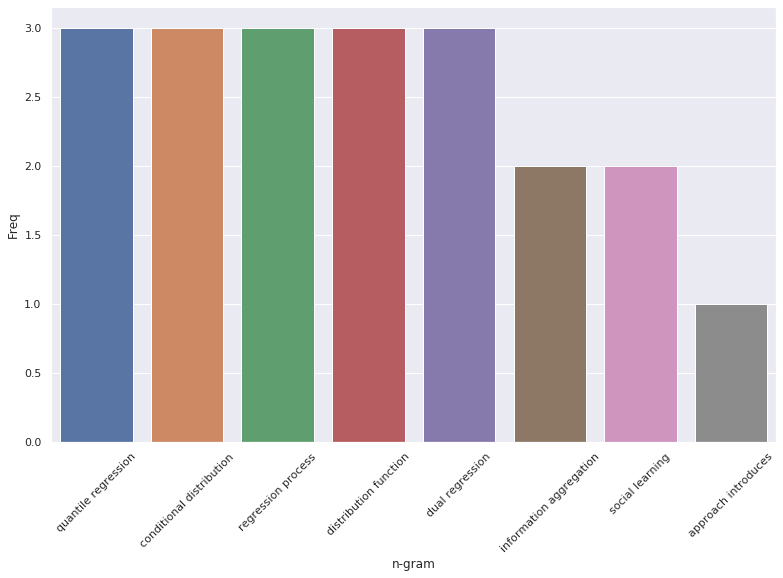

Publication in year 2007


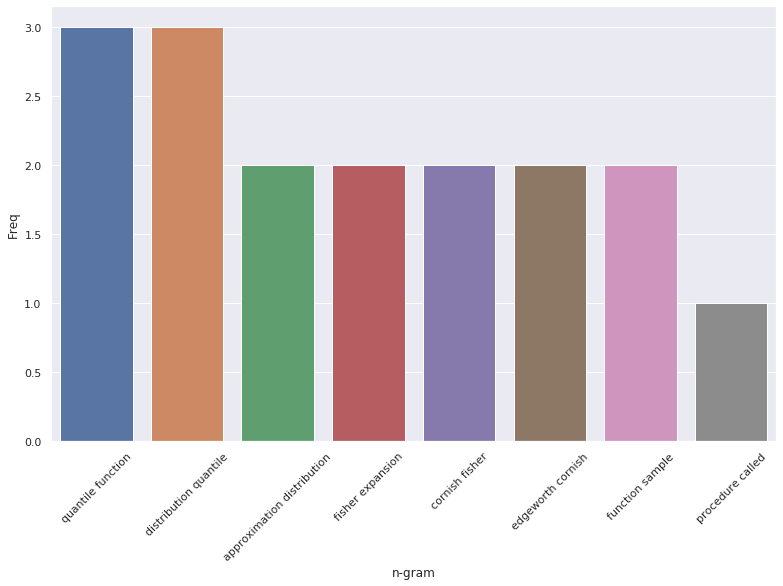

Publication in year 2015


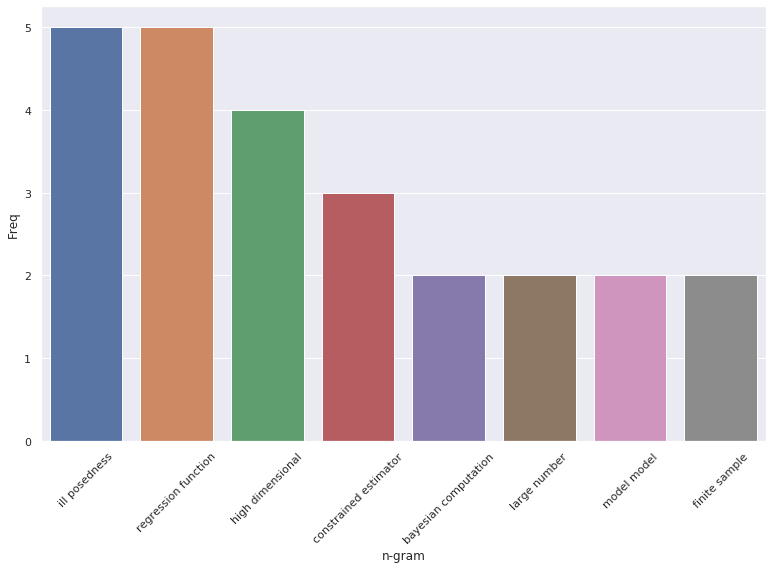

Publication in year 2014


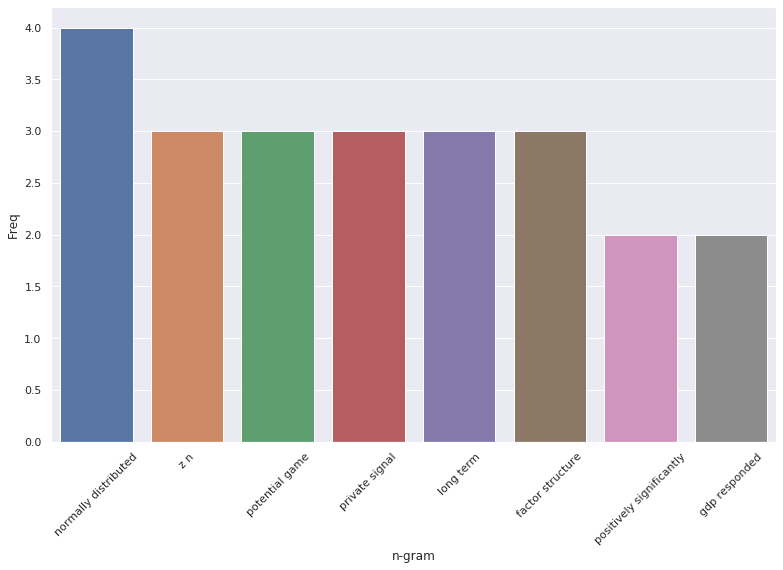

Publication in year 2013


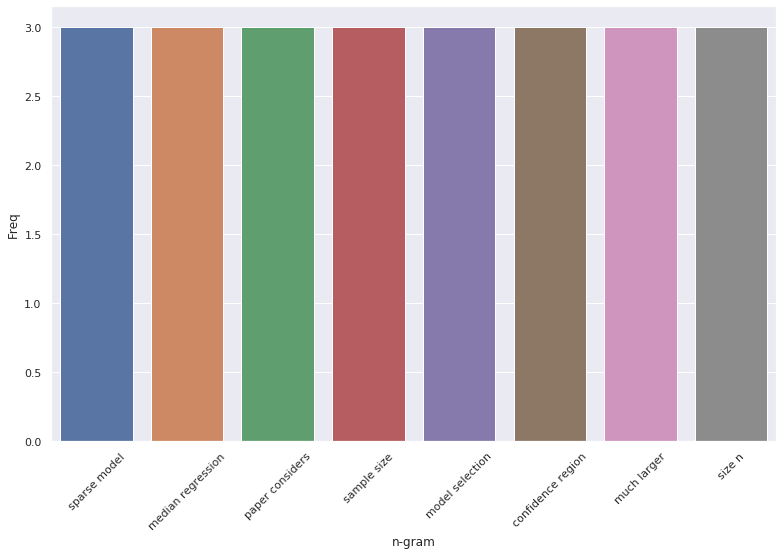

Publication in year 2008


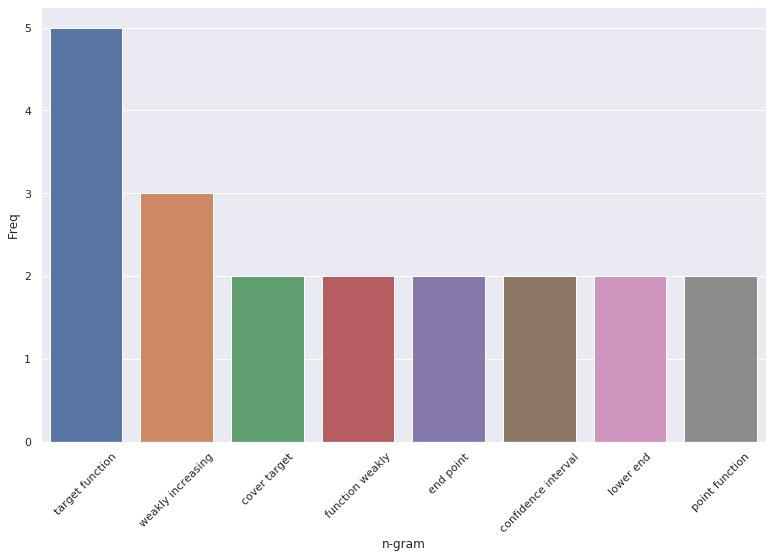

Publication in year 2010


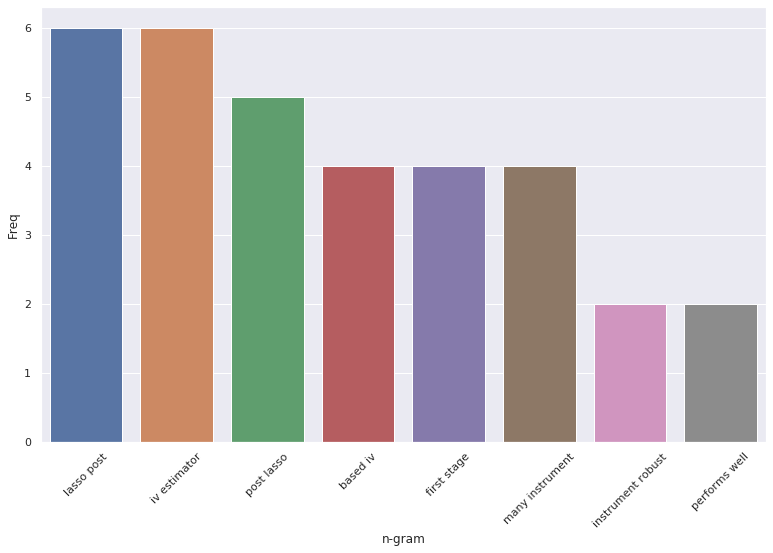

Publication in year 2009


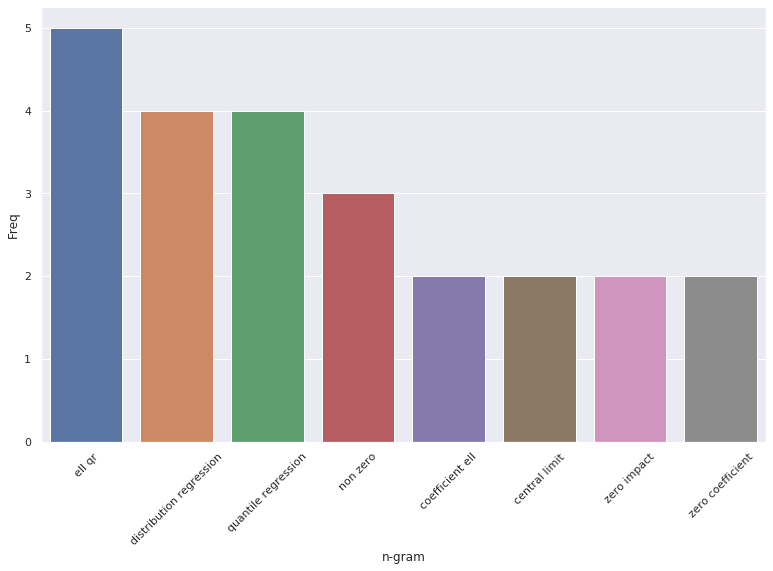

In [216]:
for years_published in economics.keys():
    print("Publication in year %s"%years_published)
    get_frequent_words(economics, years_published, ngram=2, keys=8)

Publication in year 2019


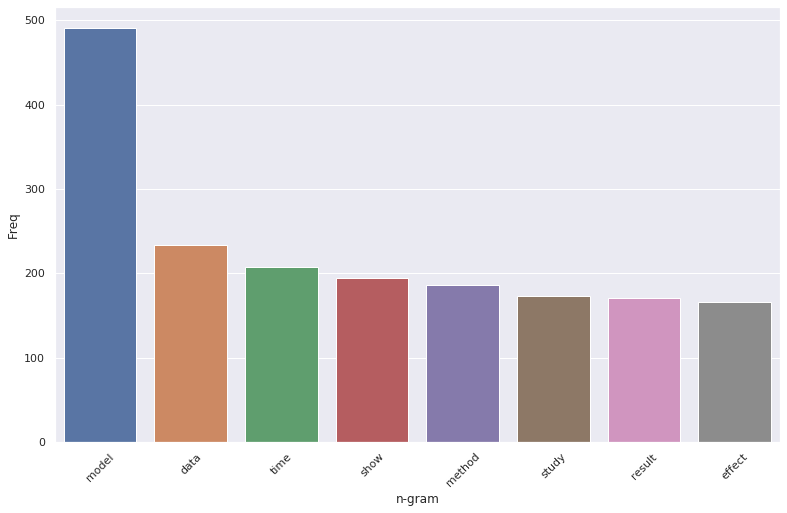

Publication in year 2017


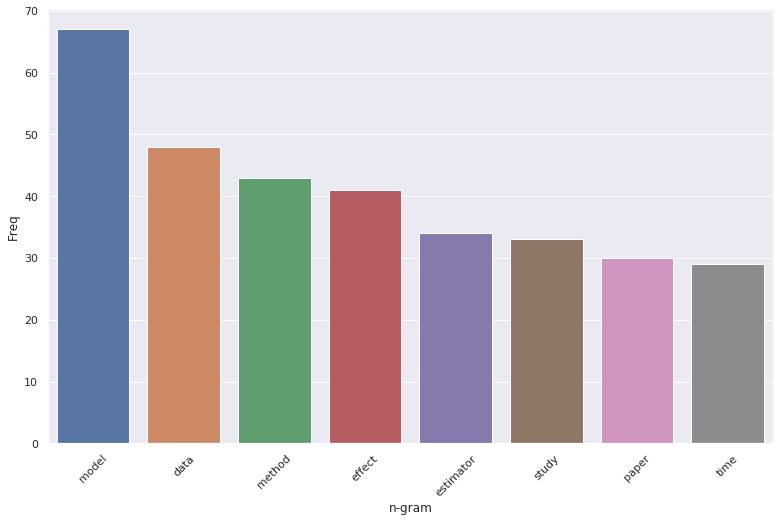

Publication in year 2018


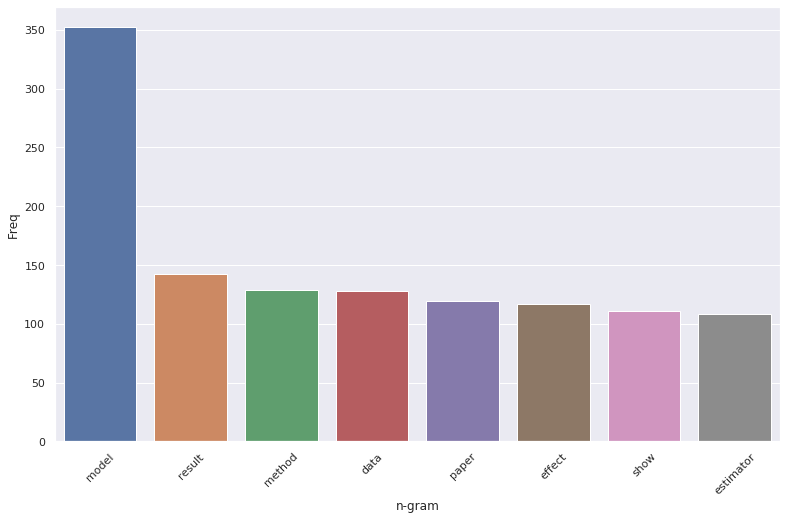

Publication in year 2020


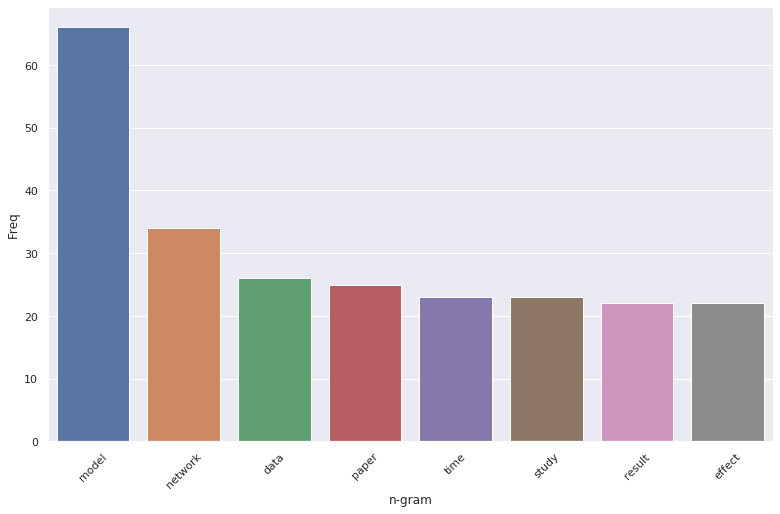

Publication in year 2016


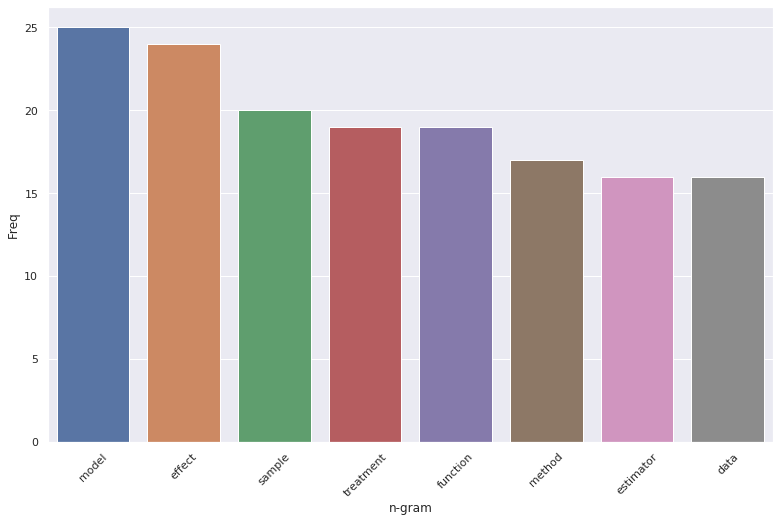

Publication in year 2012


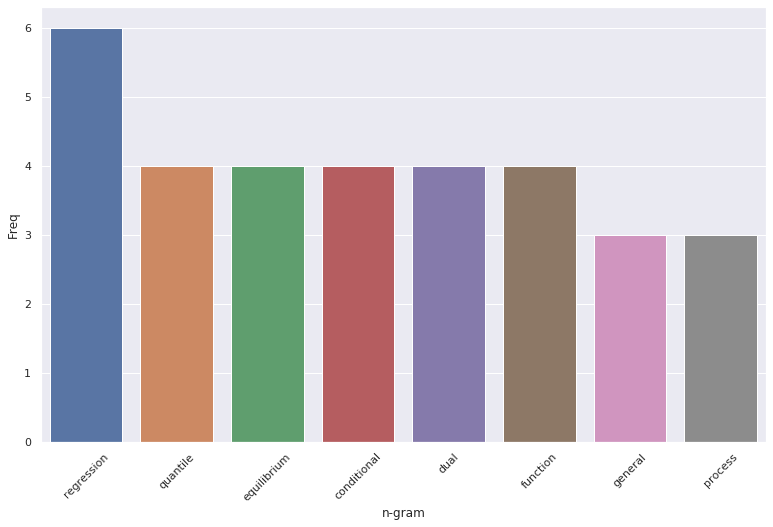

Publication in year 2007


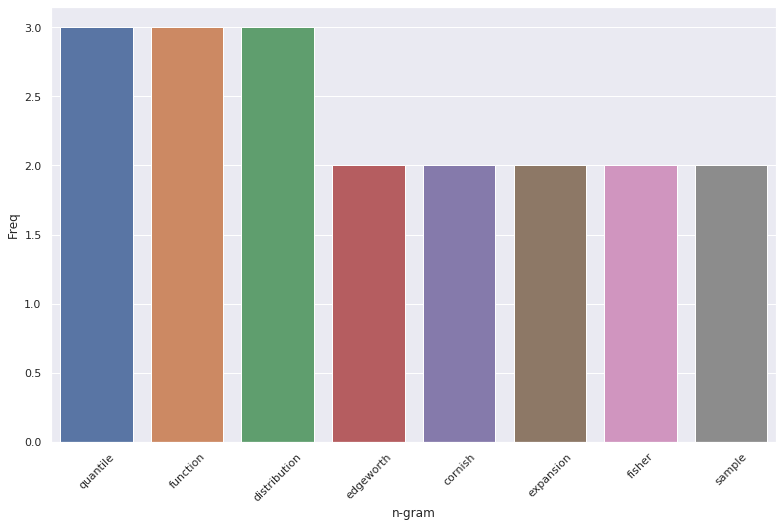

Publication in year 2015


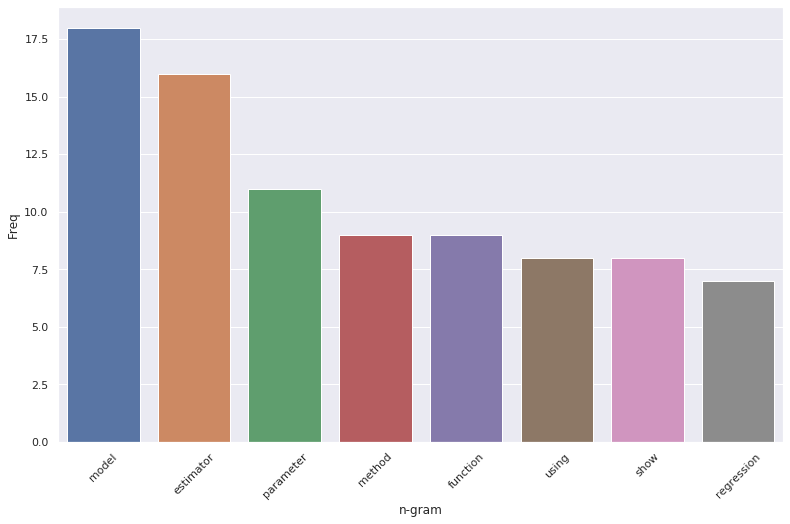

Publication in year 2014


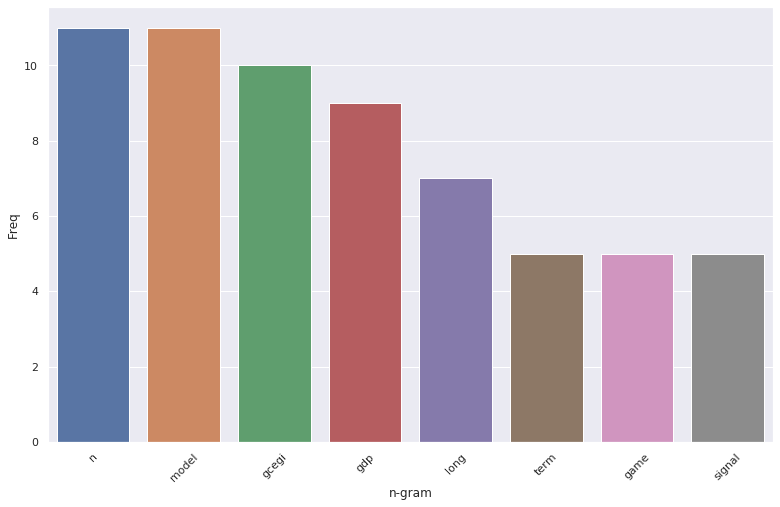

Publication in year 2013


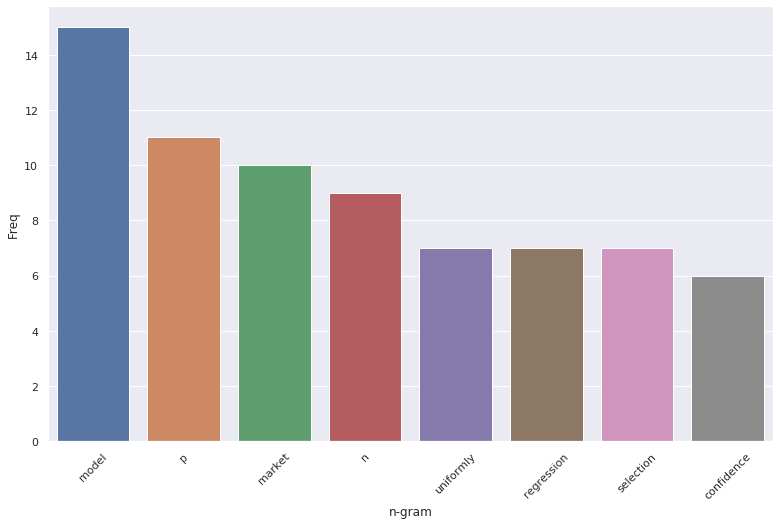

Publication in year 2008


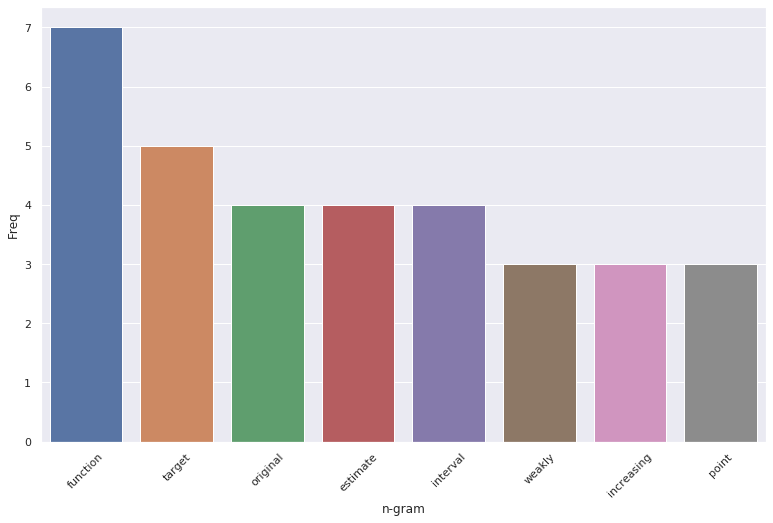

Publication in year 2010


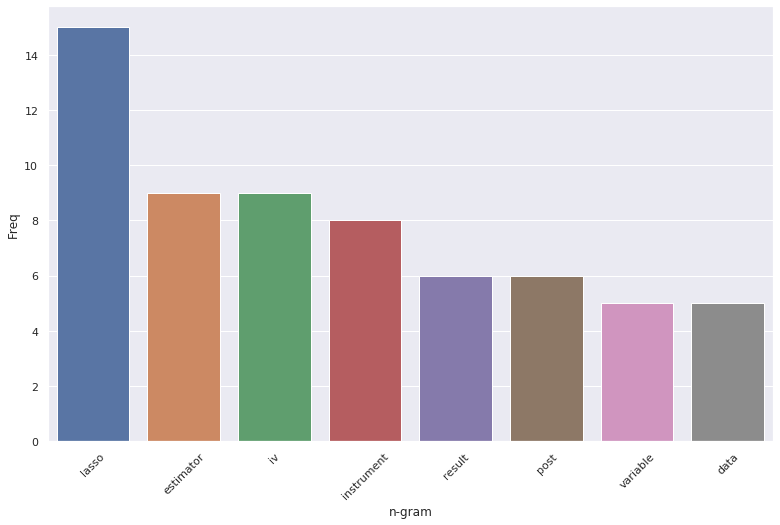

Publication in year 2009


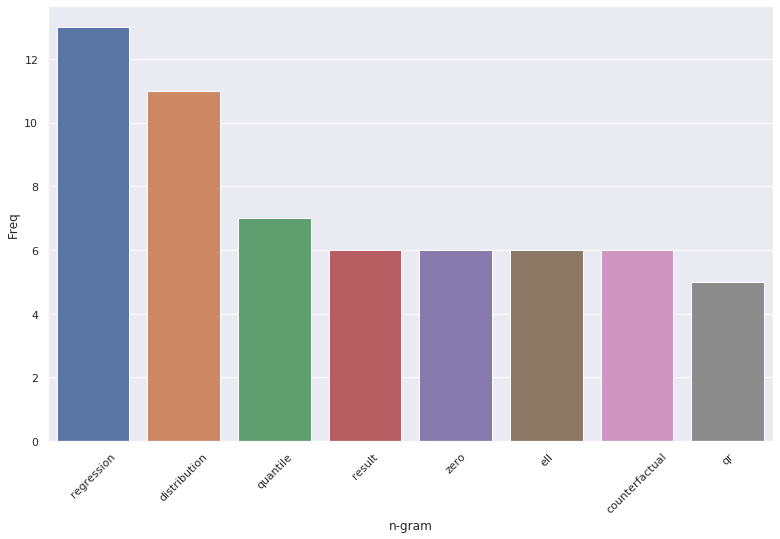

In [212]:
for years_published in economics.keys():
    print("Publication in year %s"%years_published)
    get_frequent_words(economics, years_published, ngram=1, keys=8)

## Trying to do multiprocessing

In [98]:
def get_dict_words(list_words,nprocs):
    
    from multiprocessing import Pool, current_process
    list_set = list(set(list_words))
    
    def count_word_list(word):
        return {word:list_words.count(word)}

    with Pool(processes=nprocs) as pool:
        final_dict_count = pool.map(list_set)
    return final_dict_count
    

In [213]:
def get_list_combined(list_list_words,nprocs):
    
    from multiprocessing import Pool, current_process
    length = len(list_list_words)
    list_set = list(set(list_words))
    
    def count_word_list(word):
        return {word:list_words.count(word)}

    with Pool(processes=nprocs) as pool:
        final_dict_count = pool.appy(count_word_list,list_set)
    return final_dict_count

In [276]:

def get_dict_words( word , wordList):
    return {word:wordList.count(word)}
    
def check_if_present(word):
    return word in wordList

In [277]:
def get_list_combined(list_words):
    list_set = list(set(list_words))
    
    def count_word_list(word):
        return {word:list_words.count(word)}
    
    combined_form = combined_dictonary(list(map(count_word_list,list_set)))
    return combined_form


def get_list_combined_multiprocessing(list_words):
    list_set = [list_words]
   
    def count_word_list(word):
        
        return {word:list_words.count(word)}
    
    combined_form = combined_dictonary(list(map(count_word_list,list_set)))
    return combined_form

In [278]:
def get_dict_words(list_words,nprocs):
    
    from multiprocessing import Pool, current_process

    with Pool(processes=nprocs) as pool:
        final_dict_count = pool.map(get_list_combined_multiprocessing,list_words)
    return combined_dictonary(list(final_dict_count))
    